In [1]:
import pandas as pd
import numpy as np 
df= pd.read_csv('bank-full.csv')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [2]:
print(df.dtypes)
no_rows= df.shape[0]
print("The total number of rows in the dataset is: ", no_rows)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
The total number of rows in the dataset is:  45211


In [3]:
df.isna().sum()
min_age= df['age'].min()
max_age=df['age'].max()
print("The minimum age of the  customers in the dataset is ", min_age)
print("The maximum age of the customers in the dataset is", max_age)


The minimum age of the  customers in the dataset is  18
The maximum age of the customers in the dataset is 95


In [4]:
duplicates= df.duplicated().sum()
print("The total number of duplicate values are ",  duplicates)

The total number of duplicate values are  0


In [5]:
avg_age=np.average(df['age'])
avg_balance=np.average(df['balance'])
avg_duration=np.average(df['duration'])
print("Average age of customers in the dataset is ", avg_age)
print("Average bank balance of customers in the dataset is ", avg_balance)
print("Average duration of call of the customers in the dataset is ", avg_duration)

Average age of customers in the dataset is  40.93621021432837
Average bank balance of customers in the dataset is  1362.2720576850766
Average duration of call of the customers in the dataset is  258.1630797814691


<AxesSubplot:title={'center':'Distribution of demographics by education'}, xlabel='education', ylabel='count'>

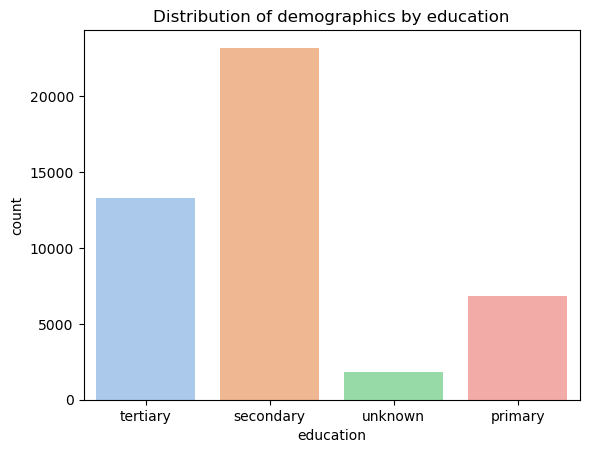

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("Distribution of demographics by education")
sns.countplot(x=df['education'], palette='pastel')

<AxesSubplot:title={'center':'Distribution of demographics by loan default'}, xlabel='default', ylabel='count'>

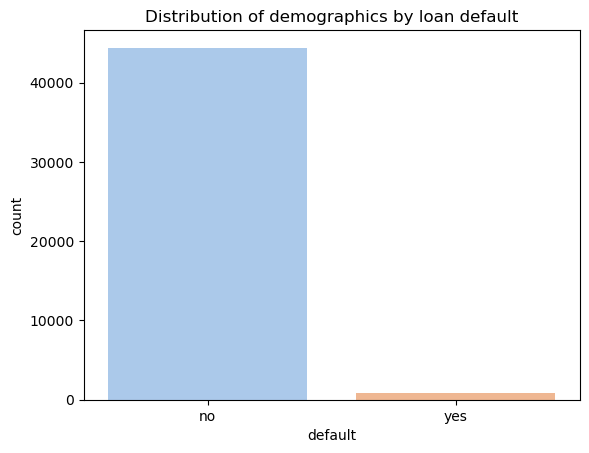

In [7]:
plt.title("Distribution of demographics by loan default")
sns.countplot(x=df['default'], palette='pastel')

<AxesSubplot:title={'center':'Success of the telemarketing campaign'}, xlabel='y', ylabel='count'>

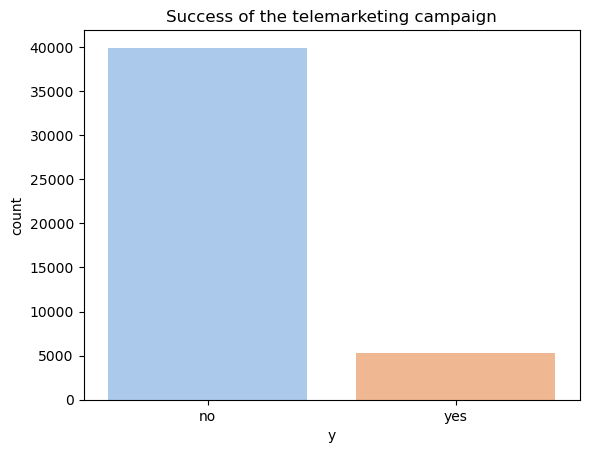

In [8]:
plt.title("Success of the telemarketing campaign")
sns.countplot(x=df['y'], palette='pastel')

<AxesSubplot:title={'center':'Distribution of demographics by loan'}, xlabel='loan', ylabel='count'>

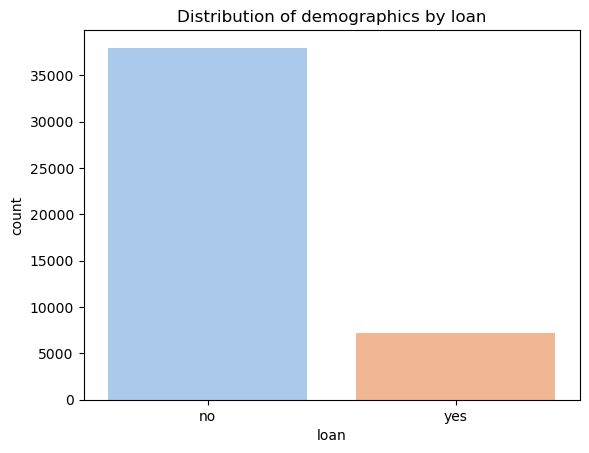

In [9]:
plt.title("Distribution of demographics by loan")
sns.countplot(x=df['loan'], palette='pastel')

<AxesSubplot:title={'center':'Distribution of demographics by housing loan'}, xlabel='housing', ylabel='count'>

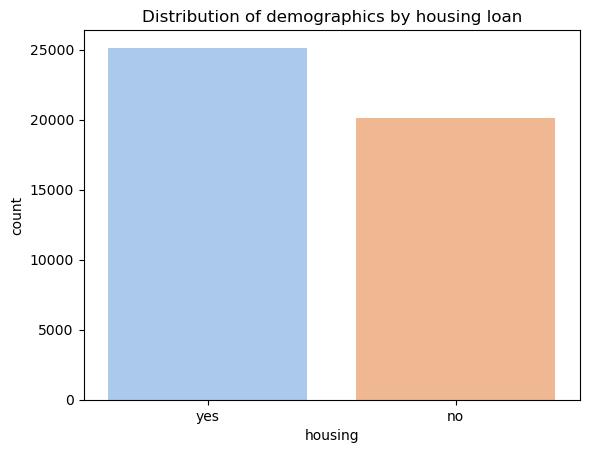

In [10]:
plt.title("Distribution of demographics by housing loan")
sns.countplot(x=df['housing'], palette='pastel')

<AxesSubplot:title={'center':'Distribution of demographics by occupation'}, xlabel='count', ylabel='job'>

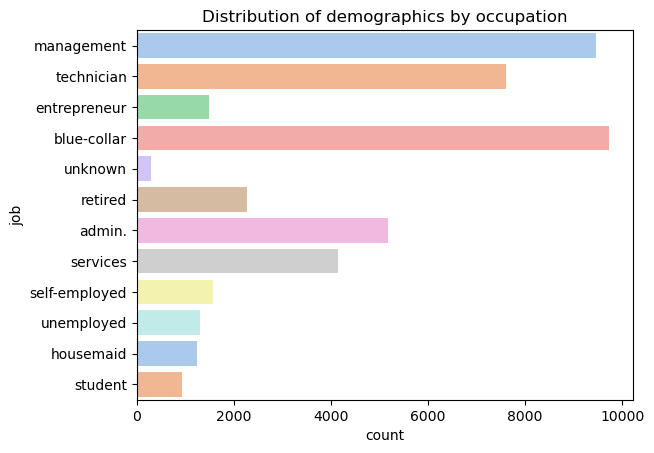

In [11]:
plt.title("Distribution of demographics by occupation")
sns.countplot(y=df['job'], palette='pastel')

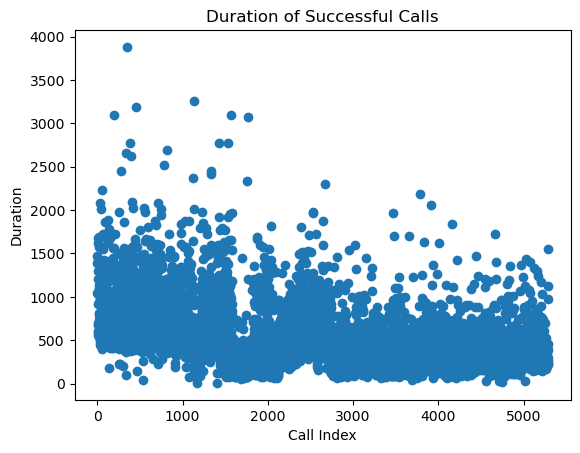

In [12]:
success_duration = df.loc[df['y'] == 'yes', 'duration']

plt.title("Duration of Successful Calls")
plt.scatter(x=range(len(success_duration)), y=success_duration)
plt.xlabel("Call Index")
plt.ylabel("Duration")
plt.show()

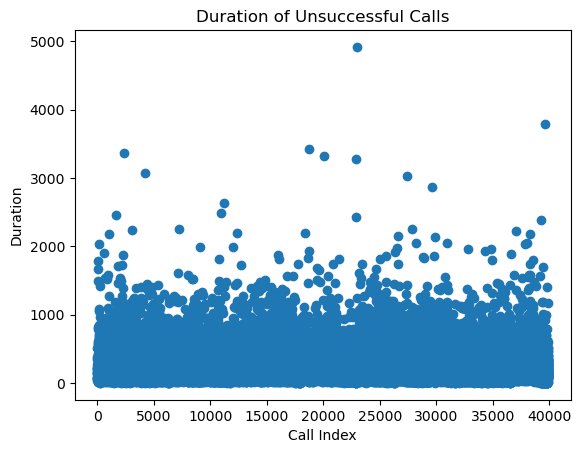

In [13]:
unsuccess_duration = df.loc[df['y'] == 'no', 'duration']

plt.title("Duration of Unsuccessful Calls")
plt.scatter(x=range(len(unsuccess_duration)), y=unsuccess_duration)
plt.xlabel("Call Index")
plt.ylabel("Duration")
plt.show()

<AxesSubplot:title={'center':'Occupation vs balance'}, xlabel='balance', ylabel='job'>

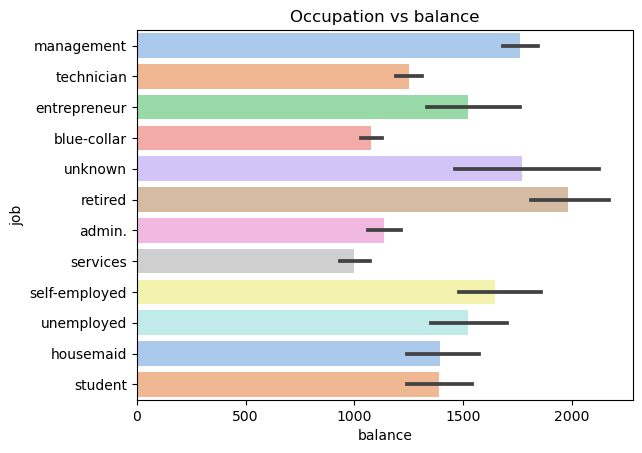

In [14]:
plt.title("Occupation vs balance")
sns.barplot(x= df['balance'], y=df['job'], palette='pastel')

In [15]:
# From the above visualizations, I have selected the following columns as my features for the ML model.
# These are: 'age', job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'duration', 'y'
# After performing the encoding in the below step, I have commenced with my prediction model.
df1 = pd.read_csv('encoded_data.csv')
# Display the column names
print(df1.columns)

Index(['age', 'job', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes'],
      dtype='object')


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the encoded dataset
df1 = pd.read_csv('encoded_data.csv')
# Drop the 'job' column
df1.drop('job', axis=1, inplace=True)


# Separate the features (X) and target variable (y)
X = df1.drop('y_yes', axis=1)
y = df1['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9643173105278678
Precision: 0.9203539823008849
Recall: 0.7684729064039408
F1-Score: 0.8375838926174496
ROC AUC Score: 0.8797138401366438


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Load the encoded dataset
df1 = pd.read_csv('encoded_data.csv')
# Drop the 'job' column
df1.drop('job', axis=1, inplace=True)


# Separate the features (X) and target variable (y)
X = df1.drop(['y_no', 'y_yes'], axis=1)
y = df1['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=123)

# Build and train the logistic regression model
model_1 = DecisionTreeClassifier(random_state=4)  
model_1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_1.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8845643520566121
Precision: 0.5067961165048543
Recall: 0.4933837429111531
F1-Score: 0.5
ROC AUC Score: 0.7148862115507431


In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import pandas as pd

# Load the encoded dataset
df1 = pd.read_csv('encoded_data.csv')

# Drop the 'job' column
df1.drop('job', axis=1, inplace=True)

# Separate the features (X) and the target variable (y)
X = df1.drop(['y_no', 'y_yes'], axis=1)
y = df1['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=123)

# Build and train the neural network model
model_2 = MLPClassifier(hidden_layer_sizes=(100, 50), random_state=4)
model_2.fit(X_train, y_train)

# Make probability predictions on the test set
y_prob = model_2.predict_proba(X_test)[:, 1]

# Adjust the decision threshold to 0.4 (lowering it to increase recall)
threshold = 0.4
y_pred = (y_prob >= threshold).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9068996019460416
Precision: 0.618421052631579
Recall: 0.5330812854442344
F1-Score: 0.5725888324873096
ROC AUC Score: 0.9158186561832924


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
# Predicting the success of a telemarketing call on a given data point on a neural network model
import numpy as np
# Preparing a new data point as a dictionary with the same column names
new_data_point = {
    'age': 30,
    'balance': 1000,
    'day': 15,
    'duration': 200,
    'campaign': 1,
    'pdays': 50,
    'previous': 2,
    'marital_divorced': 0,
    'marital_married': 1,
    'marital_single': 0,
    'education_primary': 0,
    'education_secondary': 1,
    'education_tertiary': 0,
    'education_unknown': 0,
    'default_no': 1,
    'default_yes': 0,
    'housing_no': 0,
    'housing_yes': 1,
    'loan_no': 1,
    'loan_yes': 0,
    'contact_cellular': 1,
    'contact_telephone': 0,
    'contact_unknown': 0,
    'month_apr': 0,
    'month_aug': 1,
    'month_dec': 0,
    'month_feb': 0,
    'month_jan': 0,
    'month_jul': 0,
    'month_jun': 0,
    'month_mar': 0,
    'month_may': 0,
    'month_nov': 0,
    'month_oct': 0,
    'month_sep': 0,
    'poutcome_failure': 0,
    'poutcome_other': 0,
    'poutcome_success': 1,
    'poutcome_unknown': 0
}

# Convert the dictionary to a DataFrame with a single row
new_data_df = pd.DataFrame([new_data_point])

# Make probability predictions on the new data point
new_data_prob = model_2.predict_proba(new_data_df)[:, 1]

# Adjust the decision threshold to classify the new data point
threshold = 0.4
new_data_pred = (new_data_prob >= threshold).astype(int)

# Output the prediction for the new data point
if new_data_pred[0] == 1:
    print("The new data point is predicted to be 'y_yes'")
else:
    print("The new data point is predicted to be 'y_no'")

The new data point is predicted to be 'y_yes'


In [26]:
# Predicting the success of a telemarketing call on a given data point on a logistic regression model
import numpy as np
# Preparing a new data point as a dictionary with the same column names
new_data_point = {
    'age': 65,
    'balance': 9870,
    'day': 25,
    'duration': 67,
    'campaign': 1,
    'pdays': 80,
    'previous': 2,
    'marital_divorced': 0,
    'marital_married': 1,
    'marital_single': 0,
    'education_primary': 0,
    'education_secondary': 1,
    'education_tertiary': 0,
    'education_unknown': 0,
    'default_no': 0,
    'default_yes': 1,
    'housing_no': 0,
    'housing_yes': 1,
    'loan_no': 1,
    'loan_yes': 0,
    'contact_cellular': 1,
    'contact_telephone': 0,
    'contact_unknown': 0,
    'month_apr': 0,
    'month_aug': 0,
    'month_dec': 0,
    'month_feb': 0,
    'month_jan': 0,
    'month_jul': 0,
    'month_jun': 0,
    'month_mar': 0,
    'month_may': 1,
    'month_nov': 0,
    'month_oct': 0,
     'month_sep': 0,
    'poutcome_failure': 0,
    'poutcome_other': 0,
    'poutcome_success': 1,
    'poutcome_unknown': 0
}

# Converting the dictionary to a DataFrame with a single row
new_data_df = pd.DataFrame([new_data_point])

# Making probability predictions on the new data point
new_data_prob = model.predict_proba(new_data_df)[:, 1]

# Adjusting the decision threshold to classify the new data point
threshold = 0.4
new_data_pred = (new_data_prob >= threshold).astype(int)

# Output the prediction for the new data point
if new_data_pred[0] == 1:
    print("The new data point is predicted to be 'y_yes'")
else:
    print("The new data point is predicted to be 'y_no'")

The new data point is predicted to be 'y_no'
